In [2]:
import pandas as pd
data = pd.read_csv('../old.csv')

data_group = data.groupby('醫事機構代碼')
index = data_group['醫事機構代碼'].unique()

data_group = data.groupby('醫事機構代碼')
data_group = data_group[['醫事機構代碼', '成人口罩剩餘數','兒童口罩剩餘數','來源資料時間']]


In [9]:

data_1 = data_group.get_group(index[4][0])

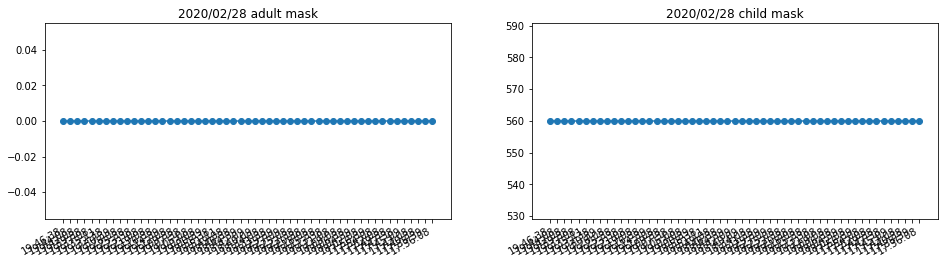

In [10]:


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


y_adult = data_1['成人口罩剩餘數']
y_child = data_1['兒童口罩剩餘數']

t = data_1['來源資料時間']
t = pd.to_datetime(t)
date = t.dt.strftime("%Y/%m/%d")
t = t.dt.strftime("%H:%M:%S")
date = date.iloc[0]


fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
ax = axes[0]
ax.plot(t, y_adult, 'o-')
ax.set_title(date+" adult mask")
fig.autofmt_xdate() 

ax = axes[1]
ax.plot(t, y_child, 'o-')
ax.set_title(date+" child mask")
fig.autofmt_xdate()